# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
from melodies_monet import driver

### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = '../yaml/control_wrfchem_aircraft_Latestfor_develop_aircraft_testmultiplemodelgroups.yaml'
                #'MELODIES-MONET/examples/yaml/control_wrfchem_aircraft.yaml' 
               #'control_wrfchem_aircraft_test2.yaml'
                
an.read_control() 
an.control_dict   

{'analysis': {'start_time': '2019-09-05-12:00:00',
  'end_time': '2019-09-06-00:00:00',
  'output_dir': '/wrk/qrasool/output_testaircraft_PR189_uptoviolin_multiplemodels',
  'debug': True},
 'model': {'wrfchem_v4.2': {'files': '/wrk/qrasool/firex_mech_qzhu/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_berk_vcp_noI_phot_soa/0905/*',
   'mod_type': 'wrfchem',
   'mod_kwargs': {'mech': 'racm_esrl_vcp'},
   'radius_of_influence': 12000,
   'mapping': {'firexaq': {'no2': 'NO2_CL_RYERSON',
     'no': 'NO_CL_RYERSON',
     'o3': 'O3_CL_RYERSON'}},
   'variables': {'pres_pa_mid': {'rename': 'pressure_model',
     'unit_scale': 1,
     'unit_scale_method': '*'},
    'temperature_k': {'rename': 'temp_model',
     'unit_scale': 1,
     'unit_scale_method': '*'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'dodgerblue', 'marker': '^', 'linestyle': ':'}},
  'wrfchem_v4.2_test': {'files': '/wrk/qrasool/firex_mech_qzhu/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_berk_vcp_noI_phot_soa/0905/*

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

NOTE: model.wrfchem_v4.2.projection is 'None' (str), but we assume you want `None` (Python null sentinel). To avoid this warning, update your control file to remove the projection setting or set to `~` or `null` if you want null value in YAML.
/wrk/qrasool/firex_mech_qzhu/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_berk_vcp_noI_phot_soa/0905/*
**** Reading WRF-Chem model output...
NOTE: model.wrfchem_v4.2_test.projection is 'None' (str), but we assume you want `None` (Python null sentinel). To avoid this warning, update your control file to remove the projection setting or set to `~` or `null` if you want null value in YAML.
/wrk/qrasool/firex_mech_qzhu/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_berk_vcp_noI_phot_soa/0905/*
**** Reading WRF-Chem model output...


In [5]:
an.models

{'wrfchem_v4.2': model(
     model='wrfchem',
     radius_of_influence=12000,
     mod_kwargs={'mech': 'racm_esrl_vcp', 'var_list': ['no', 'o3', 'no2', 'pres', 'height', 'tk', 'height_agl', 'PSFC']},
     file_str='/wrk/qrasool/firex_mech_qzhu/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_berk_vcp_noI_phot_soa/0905/*',
     label='wrfchem_v4.2',
     obj=...,
     mapping={'firexaq': {'no2': 'NO2_CL_RYERSON', 'no': 'NO_CL_RYERSON', 'o3': 'O3_CL_RYERSON'}},
     label='wrfchem_v4.2',
     ...
 ),
 'wrfchem_v4.2_test': model(
     model='wrfchem',
     radius_of_influence=12000,
     mod_kwargs={'mech': 'racm_esrl_vcp', 'var_list': ['no', 'o3', 'no2', 'pres', 'height', 'tk', 'height_agl', 'PSFC']},
     file_str='/wrk/qrasool/firex_mech_qzhu/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_berk_vcp_noI_phot_soa/0905/*',
     label='wrfchem_v4.2_test',
     obj=...,
     mapping={'firexaq': {'no2': 'NO2_CL_RYERSON', 'no': 'NO_CL_RYERSON', 'o3': 'O3_CL_RYERSON'}},
     label='wrfchem_v4.2_test'

In [6]:
an.models['wrfchem_v4.2'].obj

<xarray.Dataset>
Dimensions:         (y: 284, x: 440, time: 31, z: 50)
Coordinates:
    longitude       (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude        (y, x) float32 21.19 21.22 21.24 21.27 ... 50.28 50.24 50.2
  * time            (time) datetime64[ns] 2019-09-05 ... 2019-09-06T06:00:00
Dimensions without coordinates: y, x, z
Data variables:
    no              (time, z, y, x) float32 0.004484 0.004511 ... 5.302e-09
    o3              (time, z, y, x) float32 28.46 28.46 ... 1.971e+03 1.971e+03
    no2             (time, z, y, x) float32 0.01467 0.01473 ... 0.08481 0.08481
    pressure_model  (time, z, y, x) float32 1.007e+05 1.007e+05 ... 5.584e+03
    alt_msl_m_mid   (time, z, y, x) float32 11.4 11.39 ... 2.016e+04 2.016e+04
    temp_model      (time, z, y, x) float32 297.0 296.9 296.8 ... 220.5 220.4
    alt_agl_m_mid   (time, z, y, x) float32 11.41 11.4 ... 2.015e+04 2.016e+04
    surfpres_pa     (time, y, x) float32 1.008e+05 1.008e+05 ... 1.007e+05
Attributes: (12/15)
    FieldType:                 104
    MemoryOrder:               XYZ
    description:               NO mixing ratio
    units:                     ppmv
    stagger:                   
    coordinates:               XLONG XLAT XTIME
    ...                        ...
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

In [7]:
an.models['wrfchem_v4.2'].obj['alt_msl_m_mid']

<xarray.DataArray 'alt_msl_m_mid' (time: 31, z: 50, y: 284, x: 440)>
array([[[[1.13956261e+01, 1.13915205e+01, 1.13885164e+01, ...,
          1.17076454e+01, 1.17046232e+01, 1.17031908e+01],
         [1.13917227e+01, 1.13889999e+01, 1.13874235e+01, ...,
          1.17069454e+01, 1.17042618e+01, 1.17041187e+01],
         [1.13890944e+01, 1.13880882e+01, 1.13865299e+01, ...,
          1.17068577e+01, 1.17055378e+01, 1.17033911e+01],
         ...,
         [1.10290060e+01, 1.10270195e+01, 1.10245380e+01, ...,
          9.21303368e+00, 9.13495445e+00, 9.13425636e+00],
         [1.10262518e+01, 1.10237560e+01, 1.10156584e+01, ...,
          1.10823402e+01, 9.57869911e+00, 9.21612263e+00],
         [1.10237846e+01, 1.10201750e+01, 1.10143795e+01, ...,
          2.27575455e+01, 1.69050579e+01, 1.31301870e+01]],

        [[3.50668907e+01, 3.50537491e+01, 3.50467453e+01, ...,
          3.60334091e+01, 3.60235062e+01, 3.60189362e+01],
         [3.50553055e+01, 3.50460167e+01, 3.50400810e+01, ...,
          3.60306015e+01, 3.60224533e+01, 3.60222549e+01],
         [3.50468102e+01, 3.50438957e+01, 3.50388527e+01, ...,
          3.60302315e+01, 3.60265198e+01, 3.60199242e+01],
...
          1.88702012e+04, 1.88717520e+04, 1.88734863e+04],
         [1.89748027e+04, 1.89757480e+04, 1.89756777e+04, ...,
          1.88703477e+04, 1.88720566e+04, 1.88730840e+04],
         [1.89753691e+04, 1.89756230e+04, 1.89752539e+04, ...,
          1.88703164e+04, 1.88720098e+04, 1.88726465e+04]],

        [[2.01392070e+04, 2.01399590e+04, 2.01408359e+04, ...,
          2.01314082e+04, 2.01314316e+04, 2.01312148e+04],
         [2.01406582e+04, 2.01415586e+04, 2.01423125e+04, ...,
          2.01325215e+04, 2.01324219e+04, 2.01315605e+04],
         [2.01414531e+04, 2.01429160e+04, 2.01440371e+04, ...,
          2.01335625e+04, 2.01333125e+04, 2.01322051e+04],
         ...,
         [2.02459512e+04, 2.02457500e+04, 2.02453418e+04, ...,
          2.01555137e+04, 2.01574668e+04, 2.01593828e+04],
         [2.02446172e+04, 2.02455488e+04, 2.02454434e+04, ...,
          2.01569785e+04, 2.01590039e+04, 2.01602695e+04],
         [2.02456758e+04, 2.02460977e+04, 2.02453164e+04, ...,
          2.01582695e+04, 2.01603496e+04, 2.01604922e+04]]]],
      dtype=float32)
Coordinates:
    longitude  (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude   (y, x) float32 21.19 21.22 21.24 21.27 ... 50.33 50.28 50.24 50.2
  * time       (time) datetime64[ns] 2019-09-05 ... 2019-09-06T06:00:00
Dimensions without coordinates: z, y, x
Attributes: (12/14)
    FieldType:     104
    MemoryOrder:   XYZ
    description:   model height - [MSL] (mass grid)
    units:         m
    stagger:       
    coordinates:   XLONG XLAT XTIME
    ...            ...
    TRUELAT2:      45.0
    MOAD_CEN_LAT:  39.617638
    STAND_LON:     -97.0
    MAP_PROJ:      1
    CEN_LAT:       39.617638
    CEN_LON:       -97.77487

In [8]:
#All the info in the model class can be called here.
print(an.models['wrfchem_v4.2'].label)
print(an.models['wrfchem_v4.2'].mapping)

wrfchem_v4.2
{'firexaq': {'no2': 'NO2_CL_RYERSON', 'no': 'NO_CL_RYERSON', 'o3': 'O3_CL_RYERSON'}}


In [9]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)

2019-09-05 12:00:00
2019-09-06 00:00:00


### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [10]:
an.open_obs()

In [11]:
#All the info in the observation class can also be called.
an.obs['firexaq'].obj

<xarray.Dataset>
Dimensions:                                       (time: 2007)
Coordinates:
  * time                                          (time) datetime64[ns] 2019-...
Data variables: (12/642)
    Time_Stop                                     (time) float64 6.34e+04 ......
    Day_Of_Year_YANG                              (time) float64 248.0 ... 248.0
    latitude                                      (time) float64 38.81 ... 34.63
    longitude                                     (time) float64 -97.65 ... -...
    altitude                                      (time) float64 383.7 ... 771.0
    HAE_GPS_Altitude_YANG                         (time) float64 356.1 ... 737.3
    ...                                            ...
    smoke_age_HOLMES                              (time) float64 nan nan ... nan
    smoke_age_corr_HOLMES                         (time) float64 nan nan ... nan
    smoke_age_rise_HOLMES                         (time) float64 nan nan ... nan
    smoke_rise_HOLMES                             (time) float64 nan nan ... nan
    fire_distance_HOLMES                          (time) float64 nan nan ... nan
    smoke_agemethod_HOLMES                        (time) float64 nan nan ... nan
Attributes: (12/23)
    source:               Merged Flight#20190905, on the DC8 platform. Data i...
    Date Revised:         2022-02-11 00:00:00
    mission:              FIREXAQ
    organization:         NASA Langley Research Center
    PI:                   Suborbital Science Data for Atmospheric Composition
    PI_CONTACT_INFO:      gao.chen@nasa.gov, michael.shook@nasa.gov, ali.a.ak...
    ...                   ...
    PROJECT_INFO:         FIREXAQ
    STIPULATIONS_ON_USE:  N/A
    OTHER_COMMENTS:       This merge was created using the SSD-AC online merg...
    REVISION:             R1
    R1:                   File generated from data submitted before 2022, 2, ...
    R0:                   File was generated using the online merge tool.

In [12]:
#This just pairs the data
an.pair_data()

After pairing:        Time_Stop  Day_Of_Year_YANG   latitude                time   longitude  \
0       63435.0             248.0  38.787221 2019-09-05 17:37:05  -97.645872   
1       63445.0             248.0  38.780171 2019-09-05 17:37:15  -97.645962   
2       63455.0             248.0  38.773174 2019-09-05 17:37:25  -97.645841   
3       63465.0             248.0  38.766109 2019-09-05 17:37:35  -97.645365   
4       63475.0             248.0  38.758565 2019-09-05 17:37:45  -97.644594   
...         ...               ...        ...                 ...         ...   
1896    83375.0             248.0  34.643454 2019-09-05 23:09:25 -118.050811   
1897    83385.0             248.0  34.639363 2019-09-05 23:09:35 -118.057049   
1898    83395.0             248.0  34.635485 2019-09-05 23:09:45 -118.063092   
1899    83405.0             248.0  34.632022 2019-09-05 23:09:55 -118.068432   
1900    83415.0             248.0  34.629492 2019-09-05 23:10:05 -118.072328   

      altitude  HAE_GPS

In [13]:
an.paired['firexaq_wrfchem_v4.2'].obj
paired_data=an.paired['firexaq_wrfchem_v4.2']
paired_data.obj#.coords

<xarray.Dataset>
Dimensions:                                       (time: 1901, x: 1)
Coordinates:
  * time                                          (time) datetime64[ns] 2019-...
Dimensions without coordinates: x
Data variables: (12/646)
    Time_Stop                                     (time, x) float64 6.344e+04...
    Day_Of_Year_YANG                              (time, x) float64 248.0 ......
    latitude                                      (time, x) float64 38.79 ......
    longitude                                     (time, x) float64 -97.65 .....
    altitude                                      (time, x) float64 433.7 ......
    HAE_GPS_Altitude_YANG                         (time, x) float64 408.2 ......
    ...                                            ...
    fire_distance_HOLMES                          (time, x) float64 nan ... nan
    smoke_agemethod_HOLMES                        (time, x) float64 nan ... nan
    no2                                           (time, x) float64 0.5819 .....
    no                                            (time, x) float64 0.1132 .....
    o3                                            (time, x) float64 64.12 ......
    temp_model                                    (time, x) float64 305.7 ......

/home/qrasool/mm_developaircraftPR189_scatterviolin/MELODIES-MONET/melodies_monet/plots/aircraftplots.py:788: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='group', y='value', data=melted_comb_violin, hue='group', palette=palette, cut=0, orient='v', scale='width', inner='quartile')
/home/qrasool/mm_developaircraftPR189_scatterviolin/MELODIES-MONET/melodies_monet/plots/aircraftplots.py:788: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='group', y='value', data=melted_comb_violin, hue='group', palette=palette, cut=0, orient='v', scale='width', inner='quartile')
/home/qrasool/mm_developaircraftPR189_scatterviolin/MELODIES-MONET/melodies_monet/plots/aircraftplots.py:788: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_no

Value of fill after reading from scatter_density_config: True
Processing scatter density plot for model 'wrfchem_v4.2' and observation 'firexaq'...


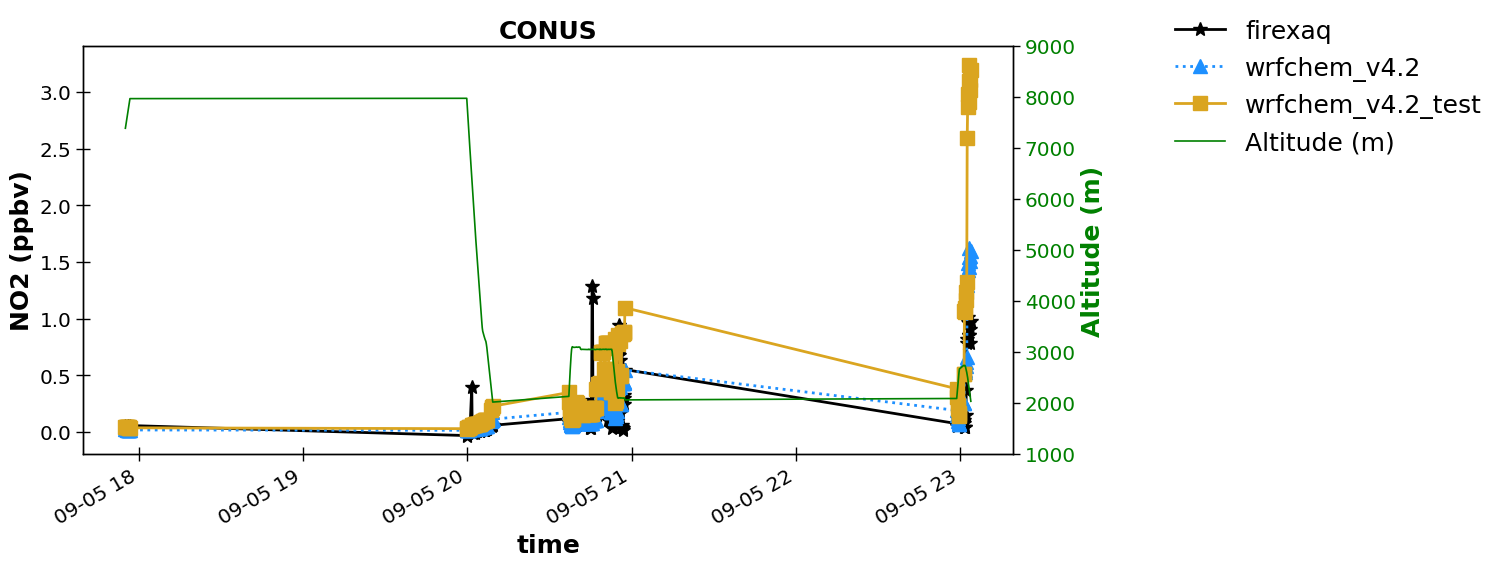

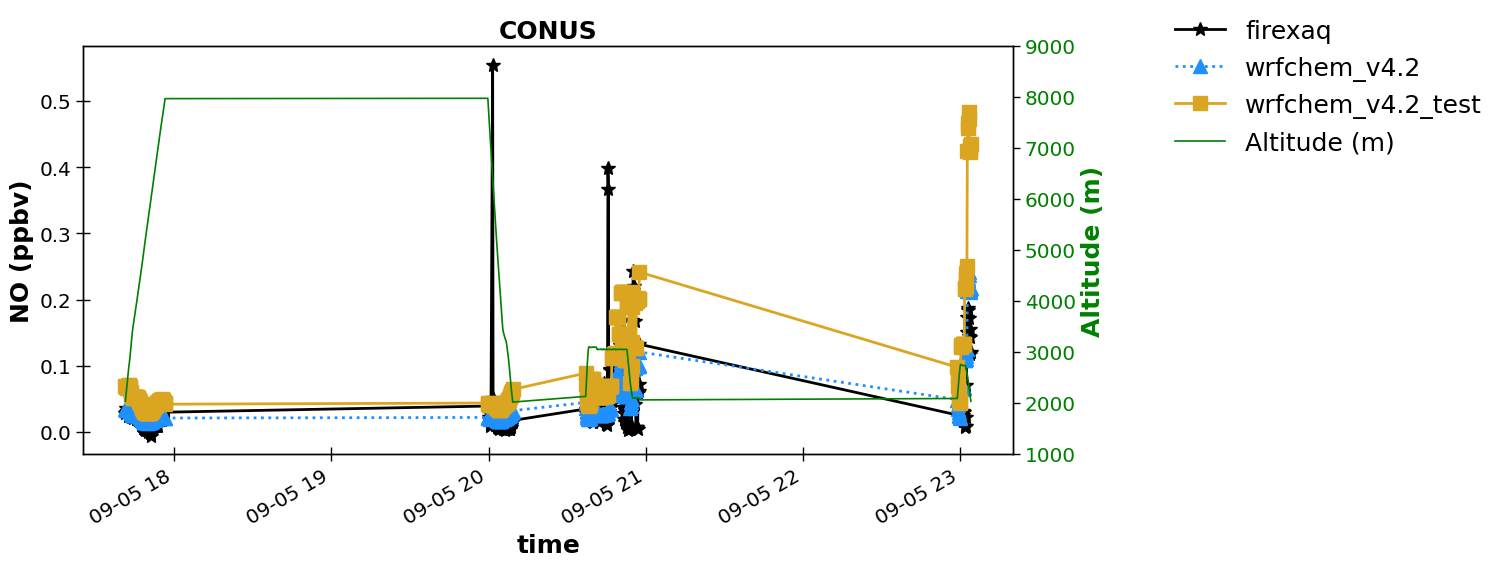

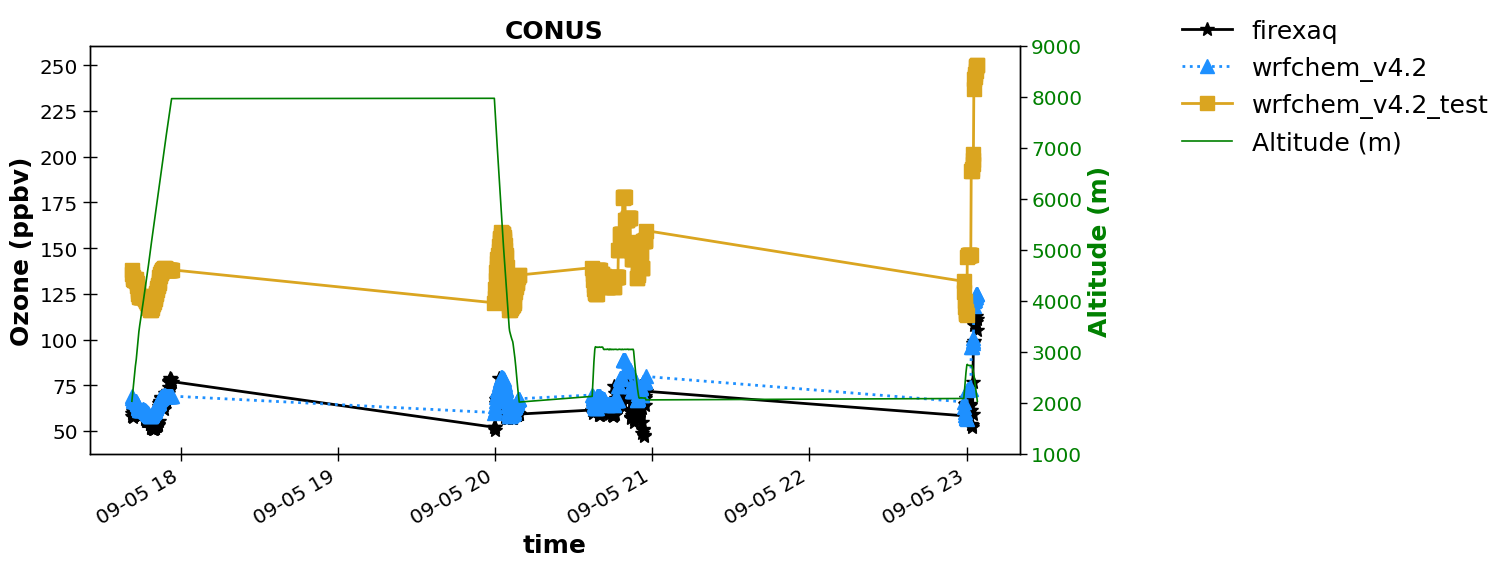

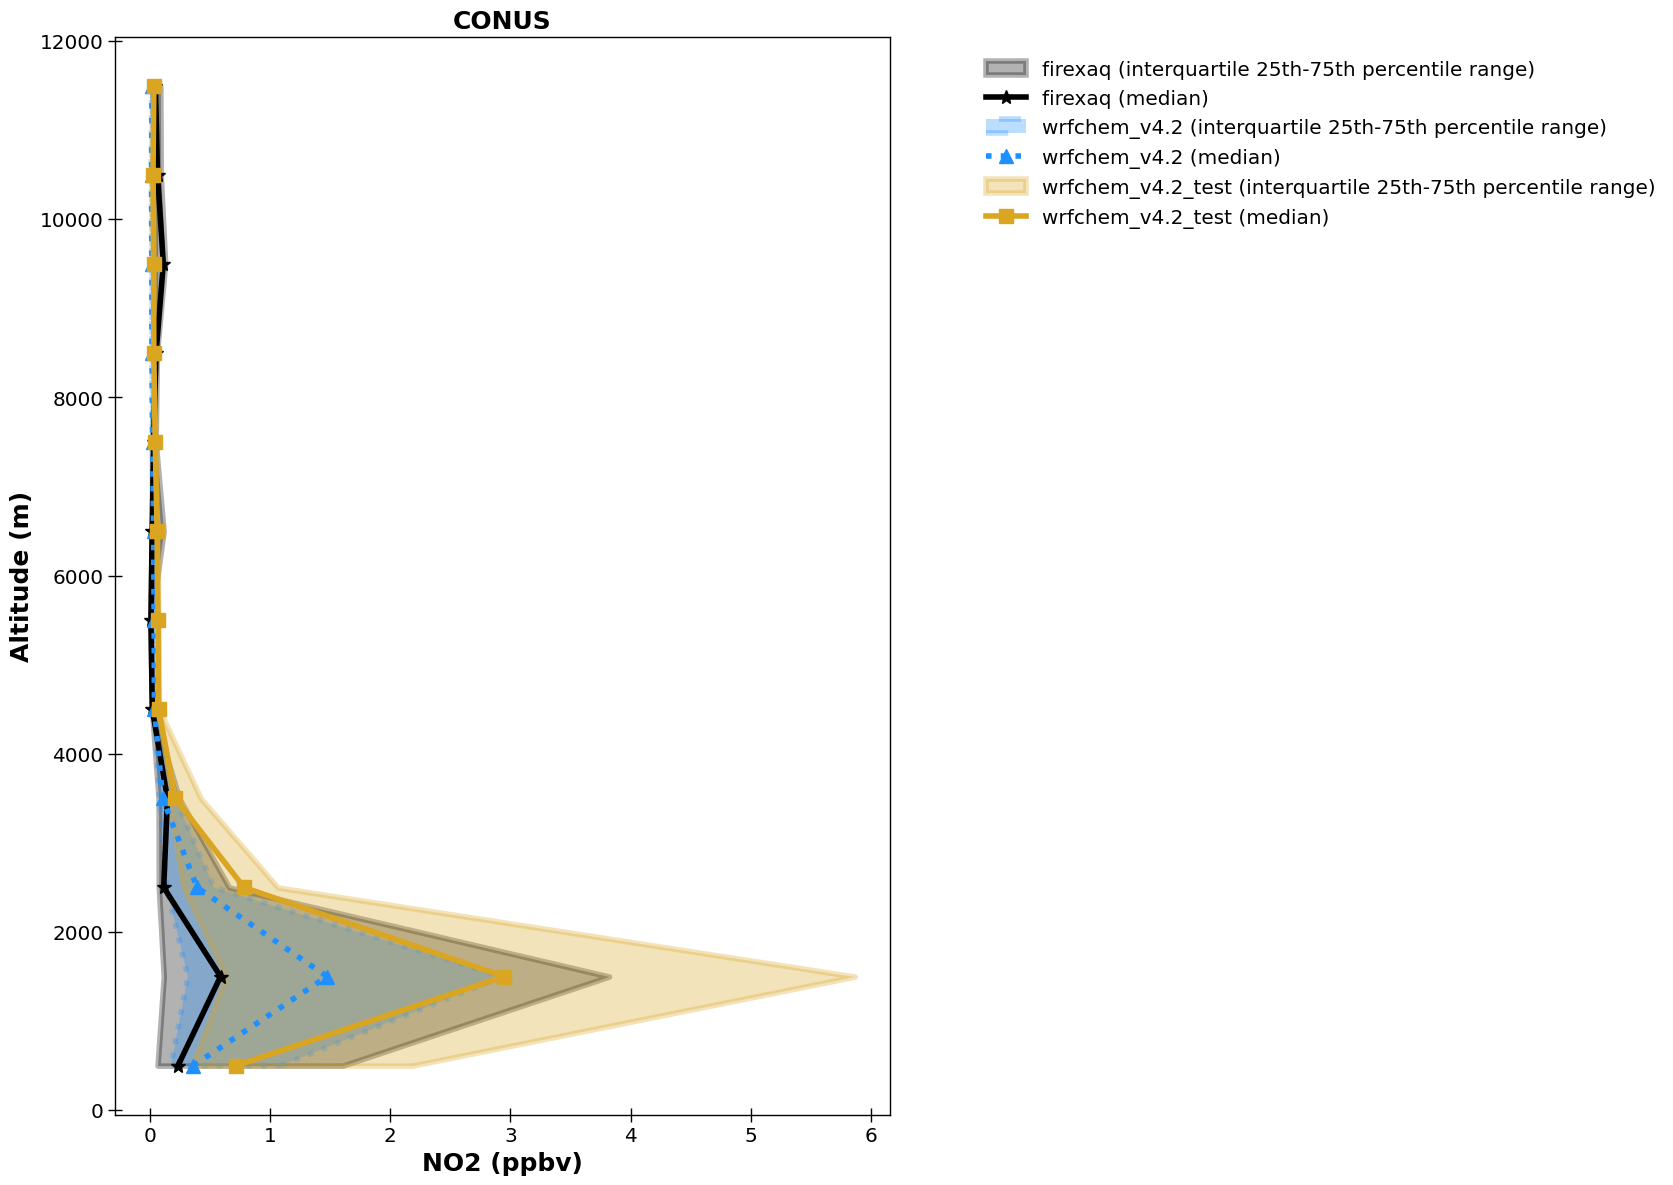

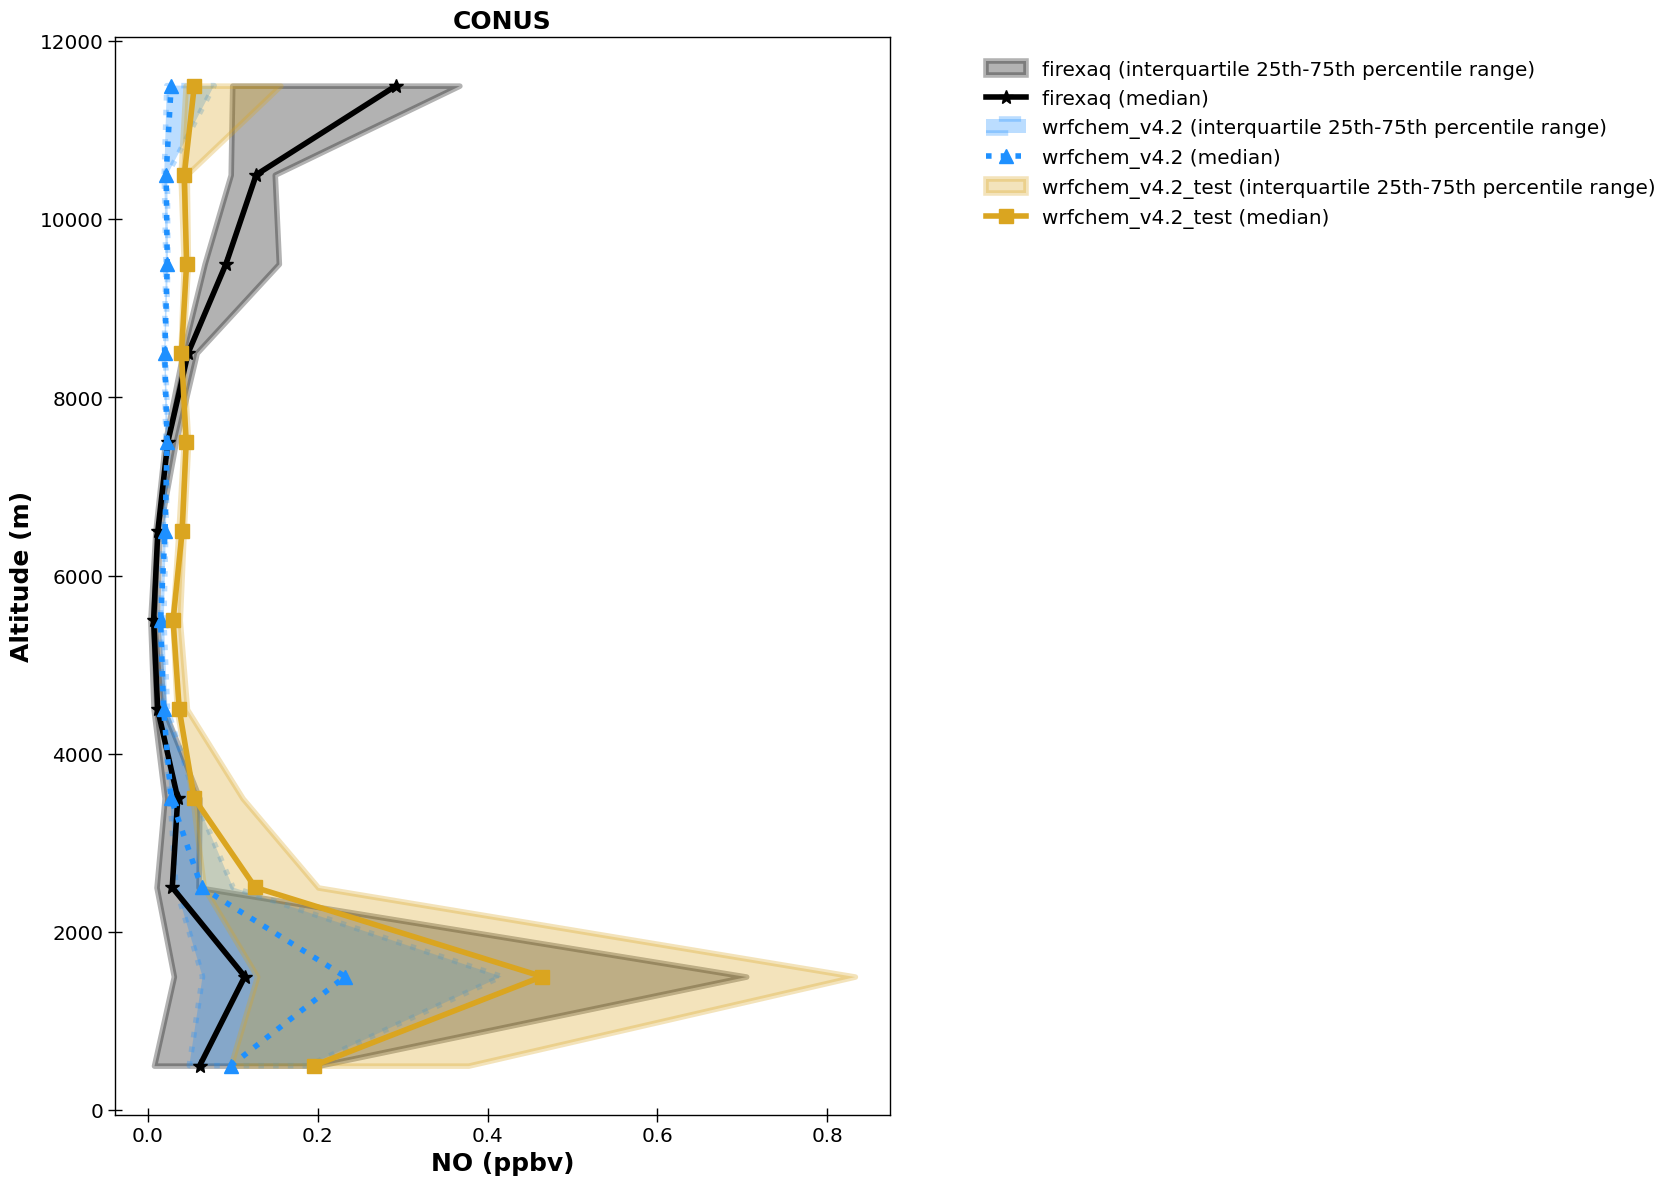

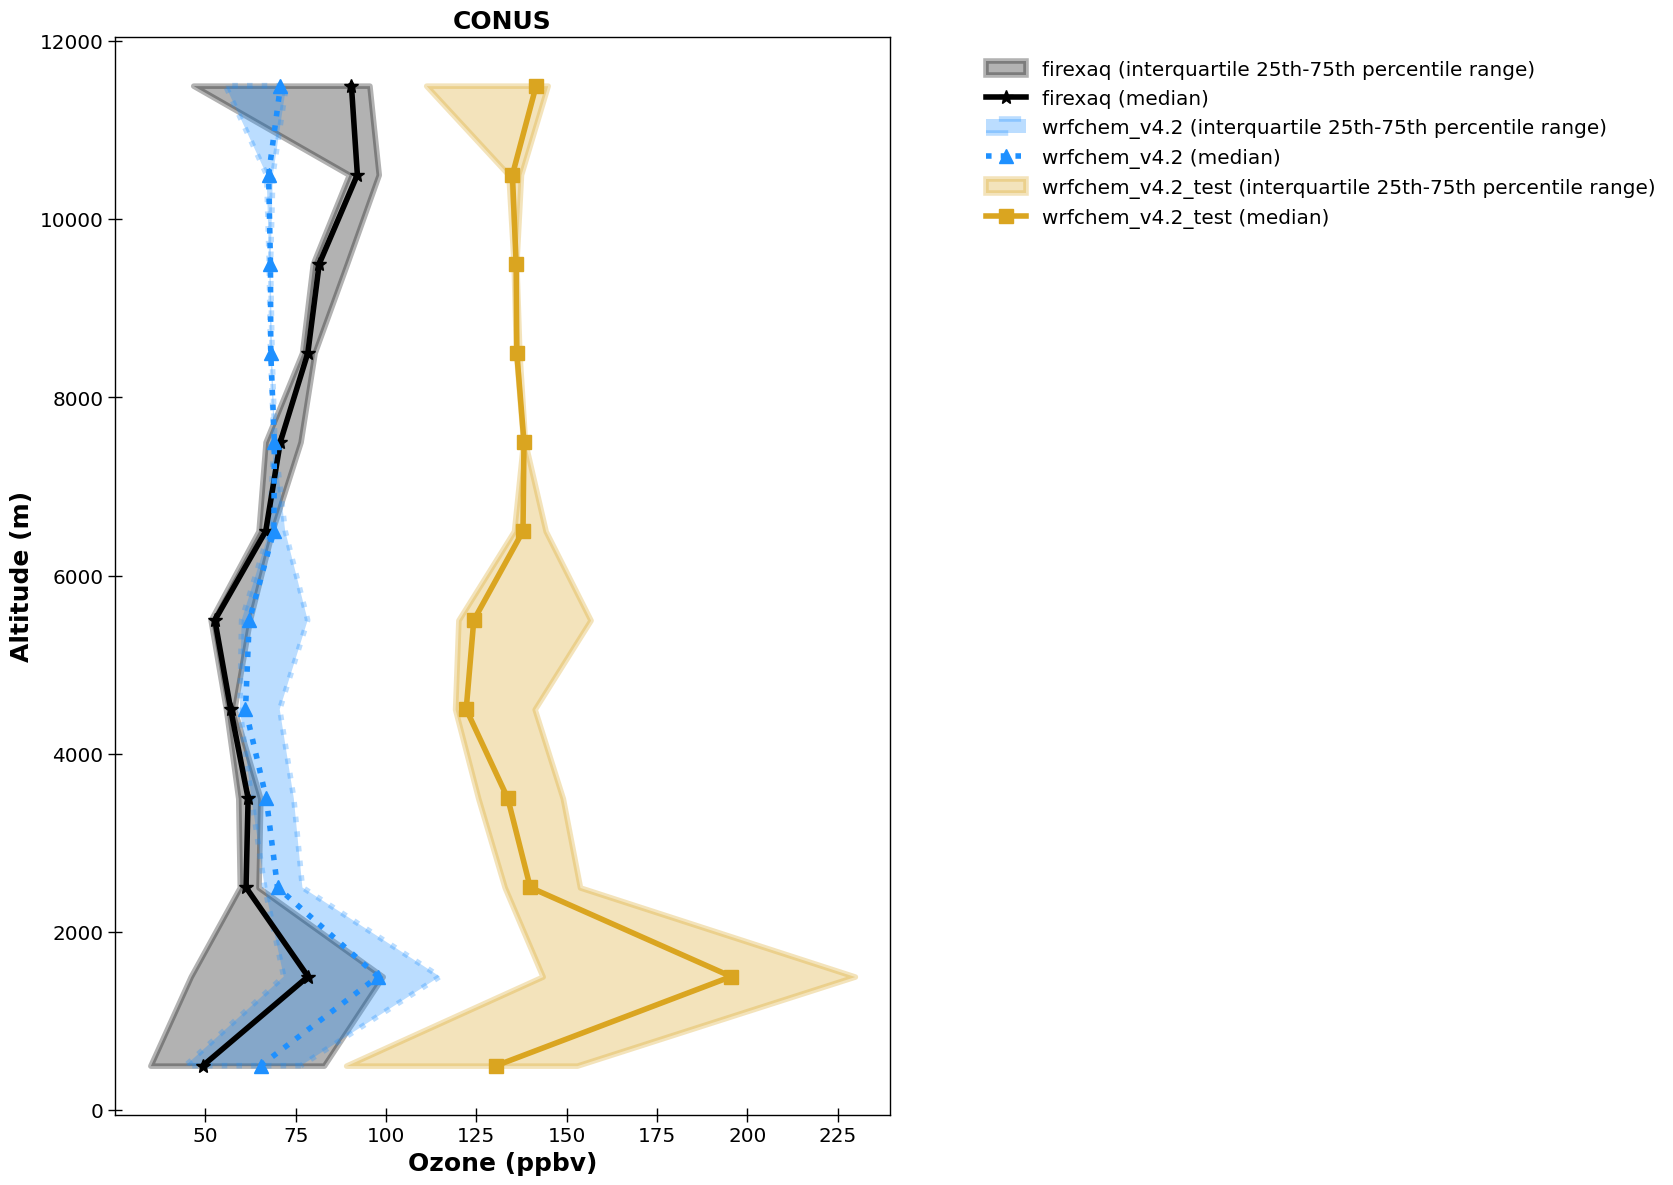

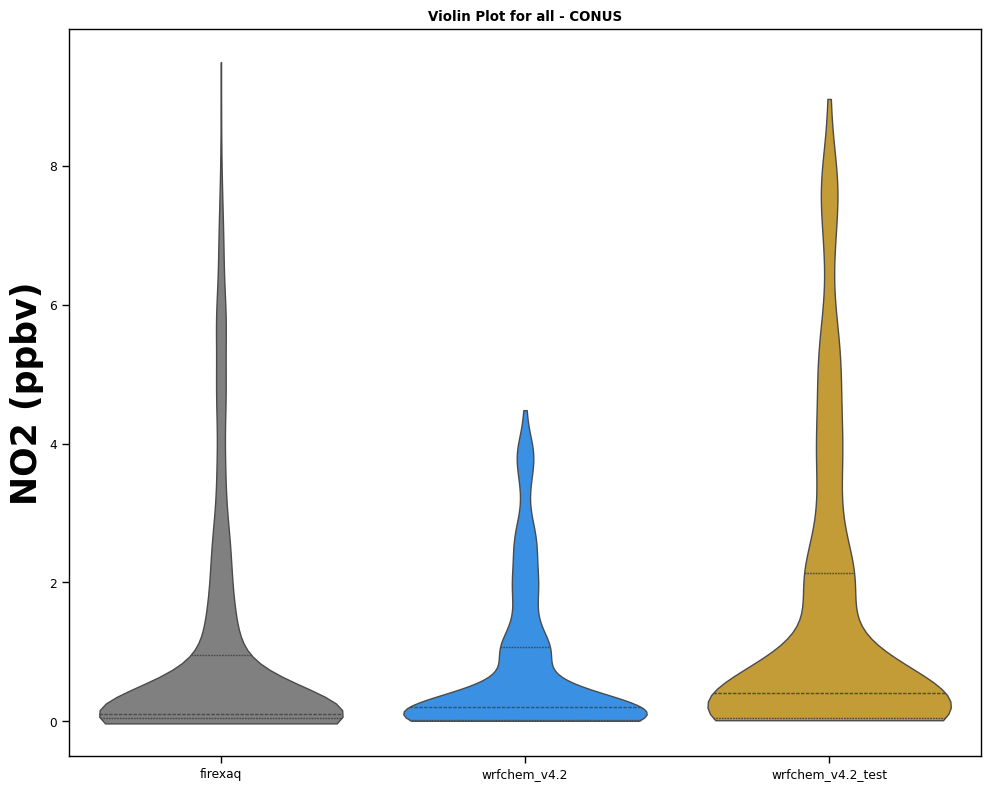

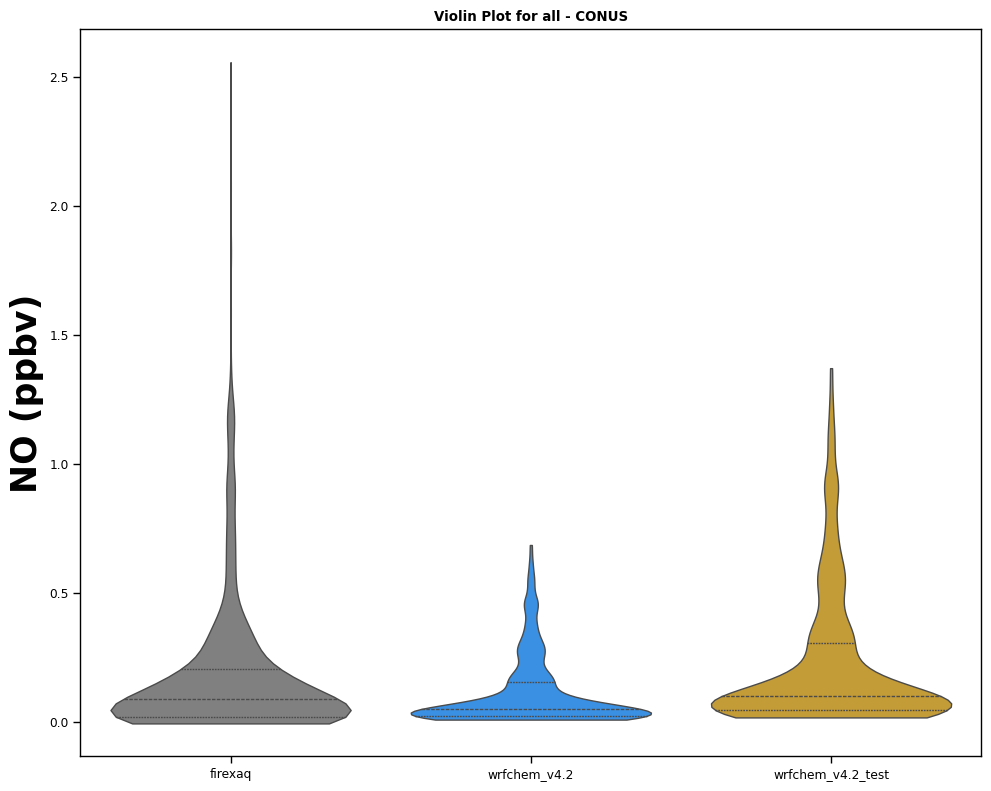

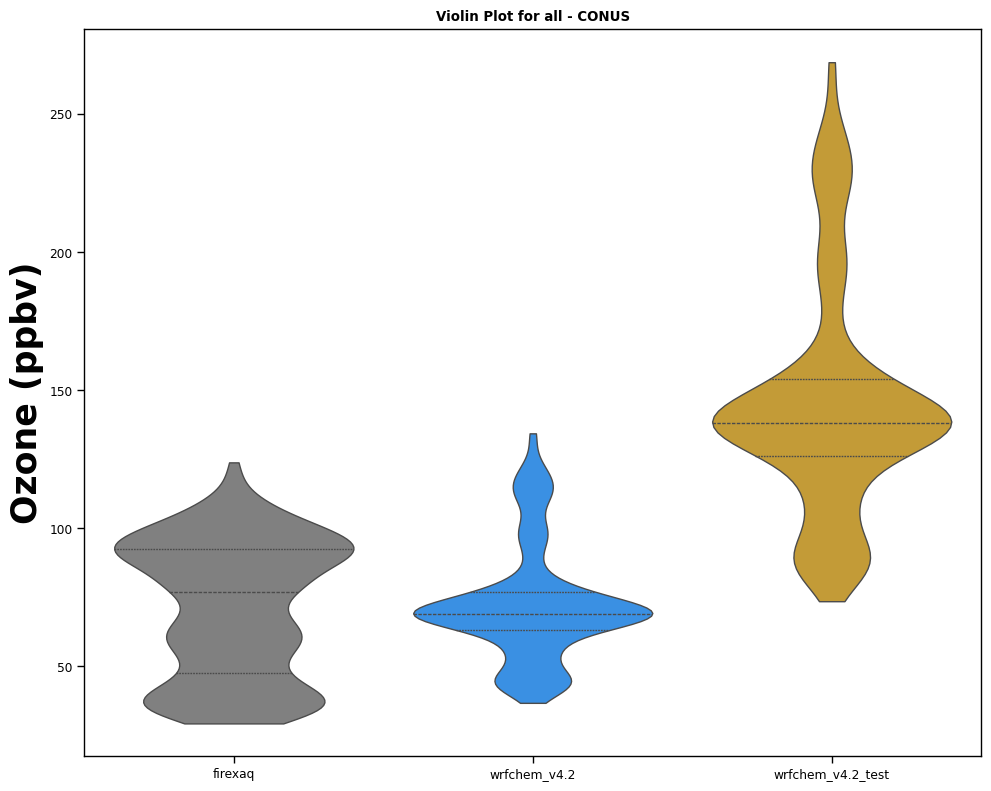

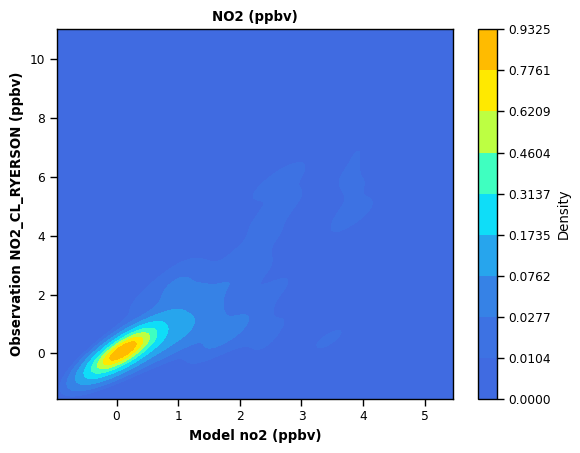

Saving scatter density plot to /wrk/qrasool/output_testaircraft_PR189_uptoviolin_multiplemodels/plot_grp4.scatter_density.NO2_CL_RYERSON.2019-09-05_12.2019-09-06_00.all.CONUS_firexaq_vs_wrfchem_v4.2.png...
Value of fill after reading from scatter_density_config: True
Processing scatter density plot for model 'wrfchem_v4.2_test' and observation 'firexaq'...


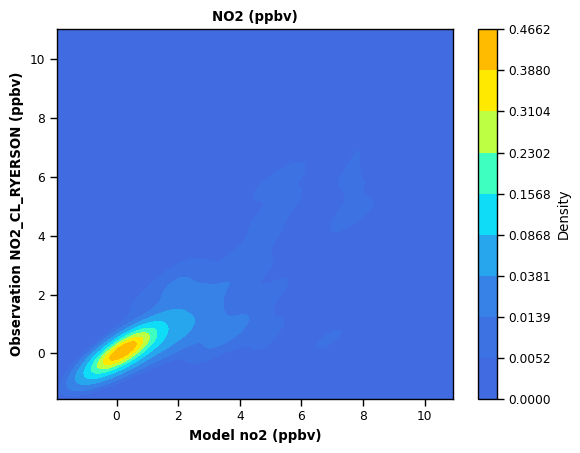

Saving scatter density plot to /wrk/qrasool/output_testaircraft_PR189_uptoviolin_multiplemodels/plot_grp4.scatter_density.NO2_CL_RYERSON.2019-09-05_12.2019-09-06_00.all.CONUS_firexaq_vs_wrfchem_v4.2_test.png...
Value of fill after reading from scatter_density_config: True
Processing scatter density plot for model 'wrfchem_v4.2' and observation 'firexaq'...


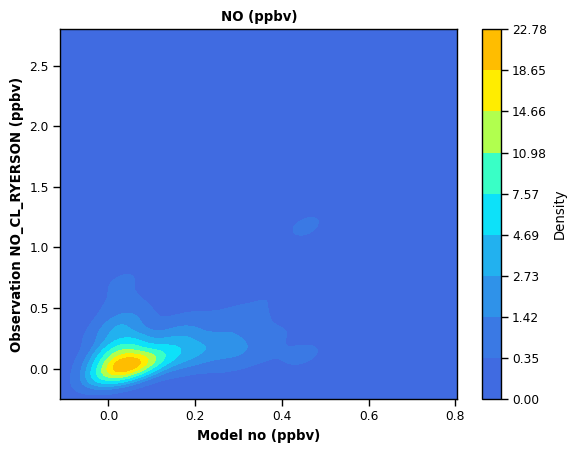

Saving scatter density plot to /wrk/qrasool/output_testaircraft_PR189_uptoviolin_multiplemodels/plot_grp4.scatter_density.NO_CL_RYERSON.2019-09-05_12.2019-09-06_00.all.CONUS_firexaq_vs_wrfchem_v4.2.png...
Value of fill after reading from scatter_density_config: True
Processing scatter density plot for model 'wrfchem_v4.2_test' and observation 'firexaq'...


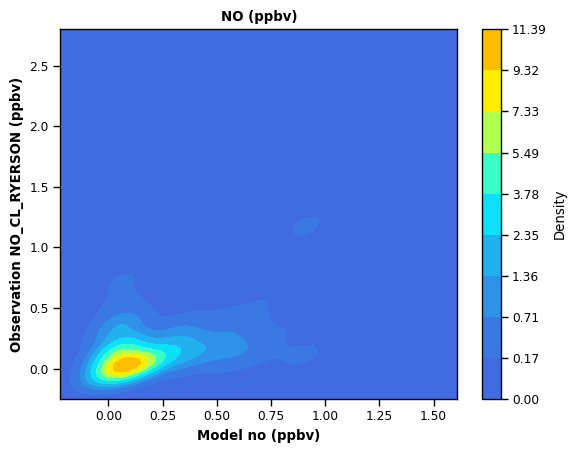

Saving scatter density plot to /wrk/qrasool/output_testaircraft_PR189_uptoviolin_multiplemodels/plot_grp4.scatter_density.NO_CL_RYERSON.2019-09-05_12.2019-09-06_00.all.CONUS_firexaq_vs_wrfchem_v4.2_test.png...
Value of fill after reading from scatter_density_config: True
Processing scatter density plot for model 'wrfchem_v4.2' and observation 'firexaq'...


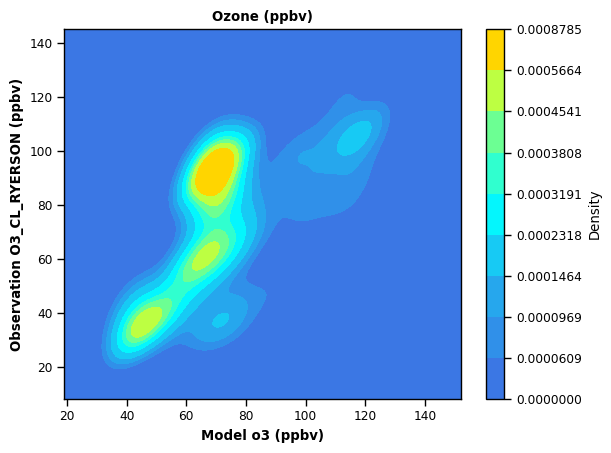

Saving scatter density plot to /wrk/qrasool/output_testaircraft_PR189_uptoviolin_multiplemodels/plot_grp4.scatter_density.O3_CL_RYERSON.2019-09-05_12.2019-09-06_00.all.CONUS_firexaq_vs_wrfchem_v4.2.png...
Value of fill after reading from scatter_density_config: True
Processing scatter density plot for model 'wrfchem_v4.2_test' and observation 'firexaq'...


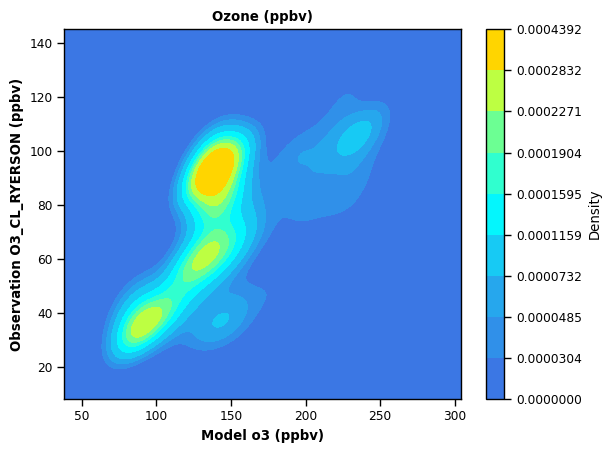

Saving scatter density plot to /wrk/qrasool/output_testaircraft_PR189_uptoviolin_multiplemodels/plot_grp4.scatter_density.O3_CL_RYERSON.2019-09-05_12.2019-09-06_00.all.CONUS_firexaq_vs_wrfchem_v4.2_test.png...
Reference std: 1.6687157922450515
Reference std: 0.2823536302739215
Reference std: 24.787977643616014


/home/qrasool/mm_developaircraftPR189_scatterviolin/MELODIES-MONET/melodies_monet/plots/surfplots.py:920: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax,x="variable", y="value",data=pd.melt(comb_bx), **boxplot_kwargs)
/home/qrasool/mm_developaircraftPR189_scatterviolin/MELODIES-MONET/melodies_monet/plots/surfplots.py:920: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax,x="variable", y="value",data=pd.melt(comb_bx), **boxplot_kwargs)
/home/qrasool/mm_developaircraftPR189_scatterviolin/MELODIES-MONET/melodies_monet/plots/surfplots.py:920: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

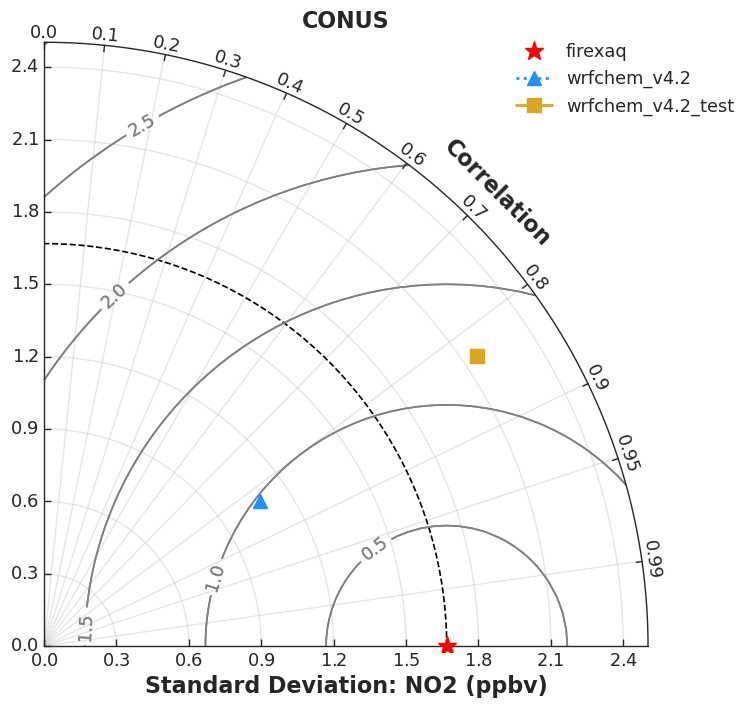

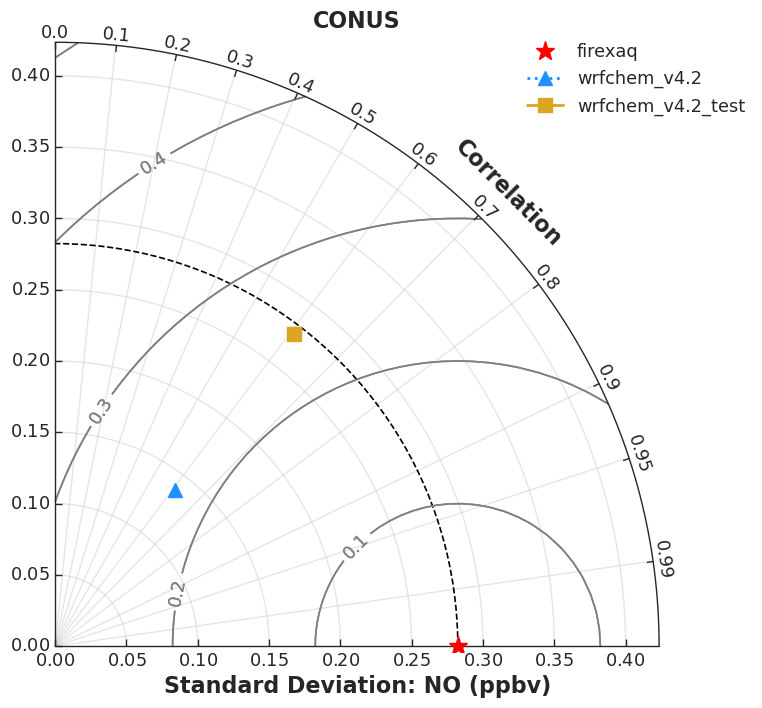

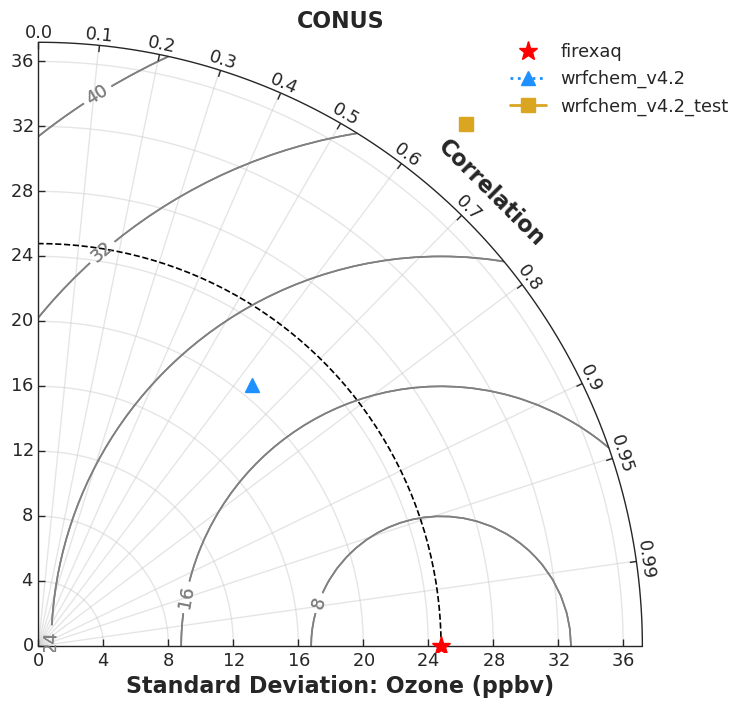

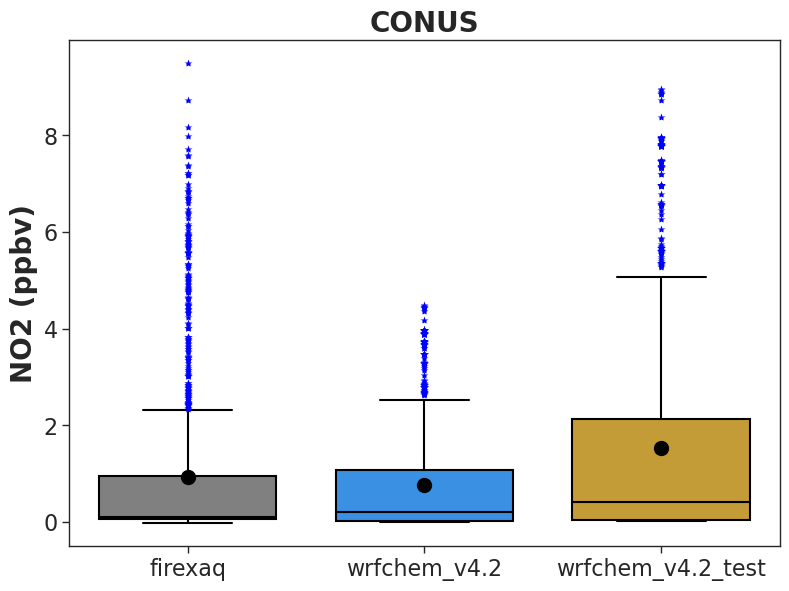

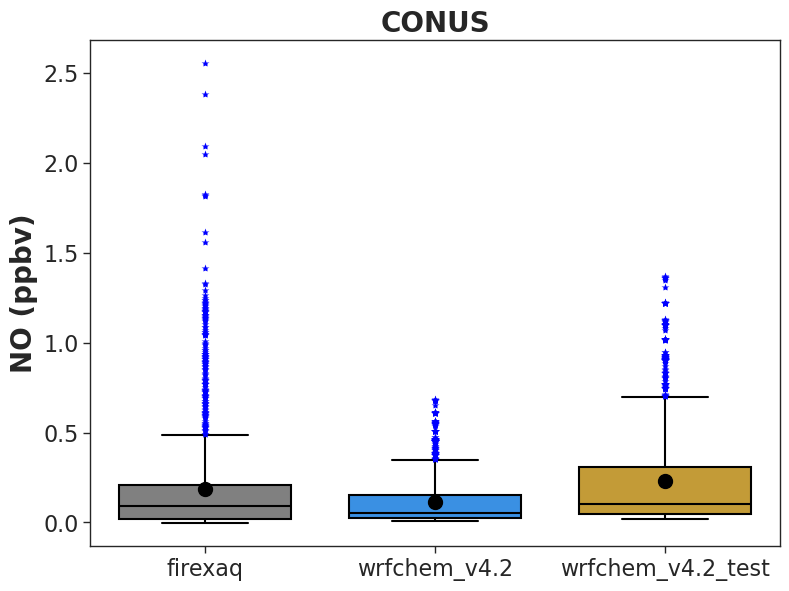

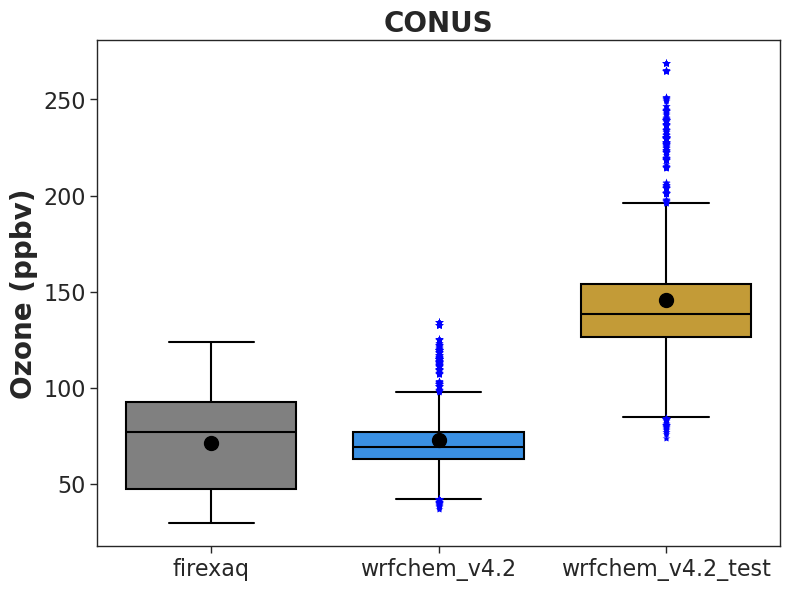

In [14]:
#And this generates all the plots.
an.plotting()

In [15]:
#Calculate stats
an.stats()                                         